
# Improve Retention by Analyzing Employee Exit Surveys


Our employer would like recommendations for improving employee retention.  We have 2 exit surveys to analyze: the Department of Education, Training and Employment (DETE) and the Technical Further Education (TAFE).

Specifically, we want to know:
1.  Are employees who worked for a short period of time resigning due to some kind of job dissatisfaction?  What about employees who were employed for longer?
2. Make the same inference but split by employee age.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# Set options
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

### Inspect dete_survey

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### Inspect tafe_survey

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

### Data Cleaning

Many of the columns in both surveys have overlapping data.  There are also many more columns than we require for performing our analysis.  We will drop some of the variable columns to create a more workable dataset.

In [11]:
drop_cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(drop_cols, axis=1)

In [12]:
drop_cols = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(drop_cols, axis=1)

Standardize the column names so we can combine the datasets.

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [14]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
col_mapper = {'Record ID': 'id', 
              'CESSATION YEAR': 'cease_date', 
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender',
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
             }

tafe_survey_updated = tafe_survey_updated.rename(columns=col_mapper)

In [16]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [17]:
dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [18]:
tafe_survey_updated["id"].duplicated().sum()

0

In [19]:
dete_survey_updated["id"].duplicated().sum()

0

### Data Filtering

The data columns that contain the reason an employee are names `seperationtype`.  We only want to analyze employess who quit or 'resigned' so we check the value counts for this variable in both data sets.

In the dete survey, there are 3 possible strings that indicate resignation by the former employee.  In the tafe survey, there is only one resignation type.  

We now filter the data in both surveys to only select former employees of the type 'resignation' and it's variants. 

In [20]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains("resignation", case=False)]

In [23]:
dete_resignations.shape

(311, 35)

In [24]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('resignation', case=False, na=False)]

In [25]:
tafe_resignations.shape

(340, 23)

The dete survey has a `cease_date` variable that represents the last day of employment and start date as the hire date.

The tafe survey has a `cease_date` variable that representst the last day of employment and a variable `institute_service` that is the length of employment.  The tafe survey does not contain a start date variable.

In [26]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

Extract the year from the dete survey `cease_date` as a float

In [27]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})")[0].astype(float)

<ipython-input-27-dfc6d0a4f26a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})")[0].astype(float)


In [28]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [29]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [30]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [31]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

All the other year values seem reasonable.

In [32]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

<ipython-input-32-db5d290dd7ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


In [33]:
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

### Can't Get No Dissatisfaction
Identify former employees who indicated they were 'dissatisfied.'
The tafe survey has 2 data columns that indicate dissatissfaction.  The values are effectively boolean and some data is missing.  We'll need to convert to proper boolean values:
1. '-' -->  False
2. any text --> True

In [34]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [35]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [36]:
tafe_resignations[tafe_resignations['Contributing Factors. Job Dissatisfaction'] != '-']['Contributing Factors. Job Dissatisfaction'].head(10)

14    Job Dissatisfaction
16                    NaN
17    Job Dissatisfaction
18                    NaN
20    Job Dissatisfaction
26    Job Dissatisfaction
51                    NaN
52    Job Dissatisfaction
58    Job Dissatisfaction
74    Job Dissatisfaction
Name: Contributing Factors. Job Dissatisfaction, dtype: object

In [37]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_dissatisfaction_factors = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [38]:
tafe_resignations['dissatisfied'] = tafe_dissatisfaction_factors.any(axis=1)

<ipython-input-38-e5f7d001f41c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['dissatisfied'] = tafe_dissatisfaction_factors.any(axis=1)


In [39]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

All the factor columns in the dete_survey are bool type so no transformation is required.  If any row contains a True value, we'll mark `dissatisfied` column as True.

In [40]:
dete_factor_cols = ['job_dissatisfaction', 
                    'dissatisfaction_with_the_department', 
                    'physical_work_environment',
                    'lack_of_recognition',
                    'lack_of_job_security',
                    'work_location',
                    'employment_conditions',
                    'work_life_balance',
                    'workload']        

In [41]:
dete_resignations['dissatisfied'] = dete_resignations[dete_factor_cols].any(axis=1, skipna=False)

<ipython-input-41-e5dcf228e386>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['dissatisfied'] = dete_resignations[dete_factor_cols].any(axis=1, skipna=False)


In [42]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [43]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [44]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the datasets

In [45]:
# Add a survey column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [46]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [47]:
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           651
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Study                            332
Contributing Factors. NONE                             332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Other                            332
Contributing Factors. Dissatisfaction                  3

In [48]:
# thresh means a column must have at least 500 not null values to remain
combined_updated = combined.dropna(axis=1, thresh=500)

In [49]:
combined_updated.notnull().sum().sort_values(ascending=False)

institute            651
dissatisfied         651
separationtype       651
id                   651
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

In [50]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [51]:
service_years = combined_updated['institute_service'].astype(str)

In [52]:
# the regex for one or more digits is \d+
service_years = service_years.str.extract(r'(\d+)')[0].astype('float')

In [53]:
def service_cat(yrs):
    if pd.isnull(yrs):
        return np.nan
    elif yrs < 3:
        return "New"
    elif 3 <= yrs <= 6:
        return "Experienced"
    elif 7 <= yrs <= 10:
        return "Established"
    elif yrs >= 11:
        return "Veteran"

In [54]:
combined_updated['service_cat'] = service_years.apply(service_cat)

<ipython-input-54-3845494ae24b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = service_years.apply(service_cat)


In [55]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [56]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [60]:
combined_pv = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

In [61]:
combined_pv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


In [89]:
%matplotlib inline

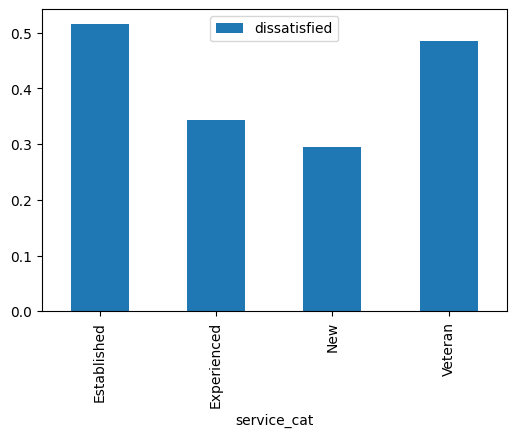

In [91]:
combined_pv.plot(kind='bar')

## Conclusion

From the bar chart above we see that Established and Veteran employees were the most likely to resign and indicate that job dissatisfaction was a contributing factor.  The chart shows the mean of value of resignations by tenure with 1 indicating an employee resigned with dissatisfaction and 0 indicating no dissatisfaction.  A value of .5 indicates that half of the group resigned due to job dissatisfaction.

Testing the .any() behavior with NaN values and skipna

In [95]:
my_df = pd.DataFrame({'A':[1, 2, np.nan], 'B': ['f', 'g', np.nan]})
my_df

,A,B
0,1.0,f
1,2.0,g
2,NaN,NaN


If skipna is False, any evaluated axis will return NaN if it contains at least one NaN value.  The default behavior ignores NaN values.  A series of all Nan will return False with skipna=True.

In [96]:
my_df.any(axis=1, skipna=True)

0     True
1     True
2    False
dtype: bool